In [2]:
import vk
session = vk.Session(access_token='60ef112660ef112660ef112689608209fe660ef60ef11263d62ac435ca5b7d42d7fd64c')
vk_api = vk.API(session, v='5.89')
group = 'pomogashkivtpu'
m = vk_api.groups.getMembers(group_id = group)

In [2]:
import time
members = m['items']
count_members = m['count'] // 1000  # т.к. максимальное число членов возвращаемое 1 запросом 1 тысяча, нам необходимо узнать сколько запросов необходимо сделать
for i in range(1, count_members+1):
    members1000 = vk_api.groups.getMembers(group_id=group, offset=i*1000)['items'] # считываем очередную 1000 членов сообщества
    members +=members1000 # прибавляем 1000 к уже имеющимся id членов сообщества
    time.sleep(0.5)
    
print('Количество участников в сообществе {0}: {1}'.format(group,len(members)))

Количество участников в сообществе pomogashkivtpu: 3208


In [3]:
#Предварительная обработка данных

import time
number_private = 0 # счетчик закрытых профилей
number_deactivated = 0 # счетчик удаленных или забанненых пользователей
for m_key in members:
    status = vk_api.users.get(user_id = m_key).pop() # смотрим данные пользователя
    for status_key in status.keys(): # берем нужное нам поле приватности
        if status_key == 'deactivated': # проверяем является ли профиль удаленным или заблокированным
            number_deactivated += 1
            members.remove(m_key)
            continue
        if status_key == 'is_closed': # проверяем является ли профиль закрытым или нет
            if status[status_key] == True:
                number_private += 1
                members.remove(m_key)
                continue
    time.sleep(0.5)
            
print('Количество приватных профилей в сообществе: ' + str(number_private))
print('Количество удаленных или забанненых профилей в сообществе: ' + str(number_deactivated))
print('Оставшиеся профили: ' + str(len(members)))
print('Проверочная сумма:'+str(number_private+number_deactivated+len(members)))

Количество приватных профилей в сообществе: 321
Количество удаленных или забанненых профилей в сообществе: 320
Оставшиеся профили: 2567
Проверочная сумма:3208


In [4]:
from collections import defaultdict
import time
number_errors = 0 # счетчик неуспешно проанализированных пользователей на подписки
number_success = 0 # счетчик успешно проанализированных пользователей на подписки
users_dict = defaultdict(dict) # специальный словарь, где каждому ключу соответсвует dict значений
for m_key in members:
        user = vk_api.users.get(user_id = m_key, fields = 'sex, bdate, city, country').pop() # выводим списки для члена сообщества номер m
        u_dict = {}
        if 'sex' in user:
            u_dict['sex'] = user['sex']
        else:
            u_dict['sex'] = 0
        if 'bdate' in user:
            u_dict['bdate'] = user['bdate']
        else:
            u_dict['bdate'] = 0
        if 'city' in user:
            u_dict['city'] = user['city']['title']
        else:
            u_dict['city'] = 0
        if 'country' in user:
            u_dict['country'] = user['country']['title']
        else:
            u_dict['country'] = 0
        users_dict[m_key] = u_dict
        number_success += 1
        time.sleep(0.5)
    
print('Общее количество человек в словаре: ' + str(len(users_dict.keys())))
print('Количество ошибок при обработке пользователей: ' + str(number_errors))
print('Количество успешно обработанных пользователей: ' + str(number_success))

Общее количество человек в словаре: 2567
Количество ошибок при обработке пользователей: 0
Количество успешно обработанных пользователей: 2567


In [3]:
import pandas as pd
df = pd.DataFrame(users_dict).T

NameError: name 'users_dict' is not defined

In [4]:
df = pd.read_csv('df_vk.csv') # read data recorded dataset

In [7]:
df['ID'] = users_dict.keys()

In [8]:
import matplotlib.pyplot as plt
def draw_pie_diagram(name):
    print(name)
    name.plot(kind='pie')
    plt.axis('equal')
    plt.show()

def draw_pie_diagram_advanced(name, lst=[], exp=None):
    print(name)
    if exp != None:
           exp = exp
    fig1, ax1 = plt.subplots(figsize=(12,7))
    ax1.pie(name, explode=exp, labels=lst, autopct='%1.1f%%', shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.legend()
    plt.show()

In [18]:
import numpy as np # работать работает, но надо ли???
df['city'] = df['city'].replace('Не указан', 'Not specified')
# df['bdate'] = df['bdate'].replace('0', np.nan)
df['country'] = df['country'].replace(0, 'Not specified')

In [5]:
df.head(10)

,bdate,city,country,sex,ID,age
0,0,Not specified,Not specified,2,1223384,NaN
1,25.12.1989,Not specified,Russia,2,2104199,30.0
2,0,Not specified,Not specified,1,3030329,NaN
3,26.7.1985,Stary Oskol,Russia,2,3365394,34.0
4,2.6,Tomsk,Russia,1,3376422,NaN
5,10.8,Tomsk,Russia,2,3501915,NaN
6,29.5.1985,Tomsk,Russia,2,3781878,34.0
7,21.6.1987,Minsk,Belarus,1,3962448,32.0
8,0,Moscow,Russia,2,4349083,NaN
9,0,Megion,Russia,1,4848322,NaN


In [74]:
df.groupby(df['bdate']== 0)['ID'].count()

bdate
False    2567
Name: ID, dtype: int64

In [80]:
df.to_csv('df_vk.csv', index=False)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567 entries, 1223384 to 569529169
Data columns (total 5 columns):
bdate      2567 non-null object
city       2567 non-null object
country    2567 non-null object
sex        2567 non-null object
ID         2567 non-null int32
dtypes: int32(1), object(4)
memory usage: 70.2+ KB


In [75]:
def get_age (date):
    if len(date) > 5:
        age = 2019 - int(date[-4:])
    else:
        age = None
    return age

df['age'] = df.apply(lambda row: get_age(row['bdate']), axis=1)

In [73]:
df['bdate'] = df['bdate'].astype(str)

In [7]:
perc = df[df['age'].isnull()]['ID'].count()/df['ID'].count()*100
print(perc)

59.17413322945072


In [9]:
median_age = df['age'].median()
print(median_age)

24.0


In [10]:
average_age = df['age'].mean()
print(average_age)

25.894083969465647


In [11]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['% of users who didnt indicate age', 'Average age','Median age']

count = 0
table.append_row([perc, median_age, average_age])
    
print(table)

+-----------------------------------+-------------+------------+
| % of users who didnt indicate age | Average age | Median age |
+-----------------------------------+-------------+------------+
|              59.174               |    24.0     |   25.894   |
+-----------------------------------+-------------+------------+


sex
0       1
1     912
2    1654
Name: ID, dtype: int64


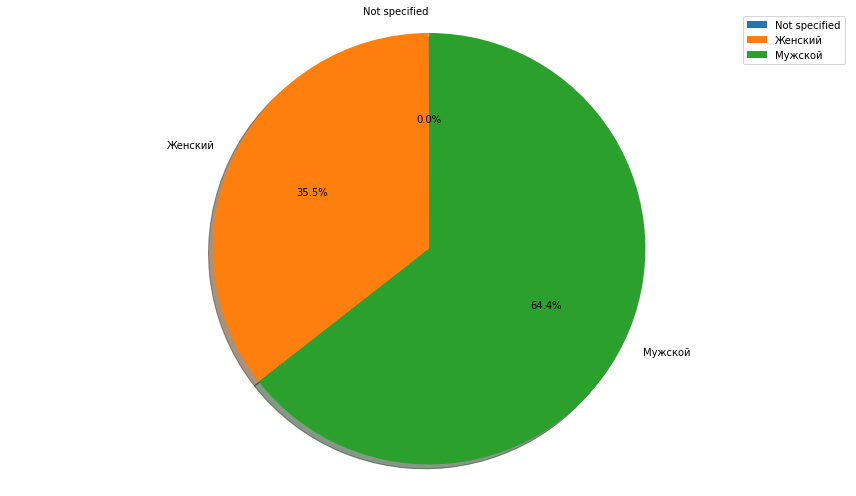

In [23]:
sex_count = df.groupby(['sex'])['ID'].count()
draw_pie_diagram_advanced(sex_count, ['Not specified', 'Женский', 'Мужской'])

In [45]:
perc_city = df[df['city'] == 'Not specified']['ID'].count()/df['ID'].count()*100
print(perc_city)

24.6980911569926


In [38]:
cities_seria = df.groupby(['city'])['ID'].count()
print(cities_seria)

city
                      1
Abakan                5
Achinsk               2
Almalyk               4
Almaty               12
Altayskoe             1
Amsterdam             1
Anapa                 1
Andorra la Vella      1
Anzhero-Sudzhensk     4
Arkhangelsk           2
Arzamas               1
Ashkhabad             1
Asino                 5
Axu                   1
Bachatsky             1
Barnaul               6
Bekabad               1
Beloe                 1
Belokurikha           1
Beloretsk             1
Belovo                3
Berezniki             1
Berezovsky            1
Bishkek               5
Biysk                 4
Blagoveschensk        2
Bryansk               2
Cheboxary             2
Chelyabinsk           2
                     ..
Tyumen                6
Udachny               1
Ufa                   6
Ulan-Ude              7
Ulyanovsk             1
Ust-Katav             1
Uzlovaya              1
Velikiy Novgorod      1
Vilyuysk              1
Vitim                 1
Vladimir   

In [40]:
countries_seria = df.groupby(['country'])['ID'].count()
print(countries_seria)

country
Albania                  2
Andorra                  1
Belarus                 11
Brazil                   1
China                    1
Cyprus                   1
Czech Republic           6
Côte d'Ivoire            1
Denmark                  1
Dominican Republic       1
Estonia                  2
France                   2
French Polynesia         1
Germany                  4
Israel                   2
Jamaica                  2
Kazakhstan             104
Kyrgyzstan               8
Luxembourg               1
Monaco                   1
Netherlands              1
Norway                   1
Not specified          359
Russia                1982
South Korea              1
Spain                    1
Switzerland              1
Tajikistan               2
Turkmenistan             3
USA                      9
Ukraine                 33
United Kingdom           1
Uzbekistan              19
Vatican City             1
Name: ID, dtype: int64


In [44]:
perc_country = df[df['country'] == 'Not specified']['ID'].count()/df['ID'].count()*100
print(perc_country)

13.985196727697701


In [30]:
cities_dict = cities_seria.to_dict() # make a dictionary of cities
countries_dict = countries_seria.to_dict() # make a dictionary from countries

In [31]:
from collections import OrderedDict
cities_sorted_by_value = OrderedDict(sorted(cities_dict.items(), key=lambda x: x[1]))
countries_sorted_by_value = OrderedDict(sorted(countries_dict.items(), key=lambda x: x[1]))

In [32]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['City', 'Members']

count = 0
for key in reversed(cities_sorted_by_value):
    table.append_row([key, cities_sorted_by_value[key]])
    count += 1
    if count == 10:
        break
    
print(table)

+------------------+---------+
|       City       | Members |
+------------------+---------+
|      Tomsk       |  1121   |
+------------------+---------+
|  Not specified   |   634   |
+------------------+---------+
|      Moscow      |   85    |
+------------------+---------+
| Saint Petersburg |   50    |
+------------------+---------+
|     Seversk      |   33    |
+------------------+---------+
|   Novosibirsk    |   30    |
+------------------+---------+
|     Kemerovo     |   27    |
+------------------+---------+
|  Yekaterinburg   |   19    |
+------------------+---------+
|      Kazan       |   16    |
+------------------+---------+
|    Karaganda     |   15    |
+------------------+---------+


In [52]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['% of users who didnt indicate city', '% of users who didnt indicate country']

count = 0
#for key in reversed(cities_sorted_by_value):
table.append_row([perc_city,perc_country])
#     count += 1
#     if count == 10:
#         break
    
print(table)

+------------------------------------+---------------------------------------+
| % of users who didnt indicate city | % of users who didnt indicate country |
+------------------------------------+---------------------------------------+
|               24.698               |                13.985                 |
+------------------------------------+---------------------------------------+


In [33]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['Country', 'Members']

count = 0
for key in reversed(countries_sorted_by_value):
    table.append_row([key, countries_sorted_by_value[key]])
    count += 1
    if count == 10:
        break
    
print(table)

+----------------+---------+
|    Country     | Members |
+----------------+---------+
|     Russia     |  1982   |
+----------------+---------+
| Not specified  |   359   |
+----------------+---------+
|   Kazakhstan   |   104   |
+----------------+---------+
|    Ukraine     |   33    |
+----------------+---------+
|   Uzbekistan   |   19    |
+----------------+---------+
|    Belarus     |   11    |
+----------------+---------+
|      USA       |    9    |
+----------------+---------+
|   Kyrgyzstan   |    8    |
+----------------+---------+
| Czech Republic |    6    |
+----------------+---------+
|    Germany     |    4    |
+----------------+---------+
